<a href="https://colab.research.google.com/github/jonathanwise123/Sales_Performance_Analysis/blob/main/CAMSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/ecommerce_nigeria_dataset_binary_success .csv")

In [4]:
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1


In [5]:
df.tail()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful
95,96,Kaduna,7/1/2024,5,Female,57,4705773,99,Bank Transfer,Desktop,Groceries,31593,0
96,97,Cross River,2/17/2024,3,Female,47,1765514,80,Credit Card,Desktop,Groceries,33686,0
97,98,Anambra,5/10/2024,21,Female,41,1019034,17,Credit Card,Mobile,Electronics,21220,0
98,99,Enugu,11/4/2023,0,Male,23,4279261,77,Online payment,Tablet,Groceries,33595,0
99,100,Abuja,5/17/2024,4,Male,45,1368236,49,Online payment,Desktop,Fashion,2518,1


In [6]:
df.isnull().sum()

CustomerID                  0
Location                    0
Date                        0
Transaction Hour            0
Gender                      0
Age                         0
Annual Income (NGN)         0
Spending Score              0
Payment Method              0
Device Used                 0
Product Category            0
Transaction Amount (NGN)    0
Is Payment Successful       0
dtype: int64

In [7]:
df.describe()

,CustomerID,Transaction Hour,Age,Annual Income (NGN),Spending Score,Transaction Amount (NGN),Is Payment Successful
count,100.000000,100.000000,100.00000,1.000000e+02,100.000000,100.000000,100.00000
mean,50.500000,11.040000,38.61000,3.856410e+06,54.310000,26277.990000,0.43000
std,29.011492,7.143437,12.37617,1.831768e+06,28.758379,13506.838016,0.49757
min,1.000000,0.000000,18.00000,8.154720e+05,3.000000,2518.000000,0.00000
25%,25.750000,4.000000,27.00000,2.114703e+06,31.250000,14703.750000,0.00000
50%,50.500000,11.000000,39.50000,4.199254e+06,50.500000,27371.500000,0.00000
75%,75.250000,18.000000,47.50000,5.445154e+06,83.000000,38571.000000,1.00000
max,100.000000,23.000000,60.00000,6.983119e+06,100.000000,49116.000000,1.00000


<Axes: xlabel='Spending Score', ylabel='Density'>

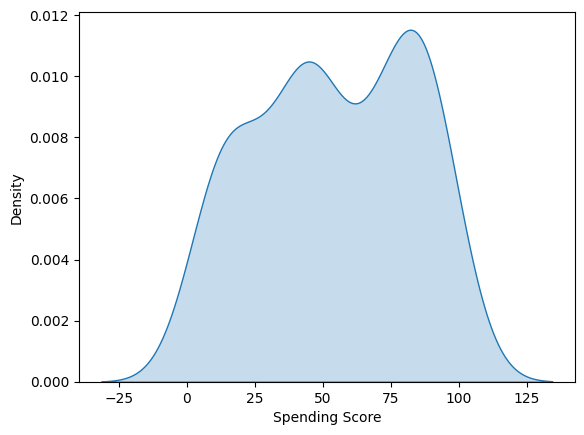

In [15]:
sns.kdeplot(df['Spending Score'], shade = True)

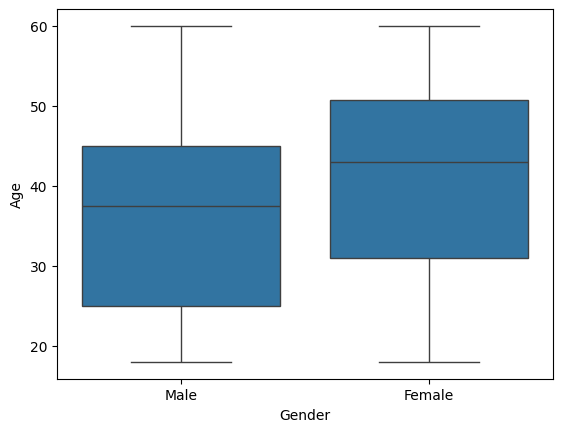

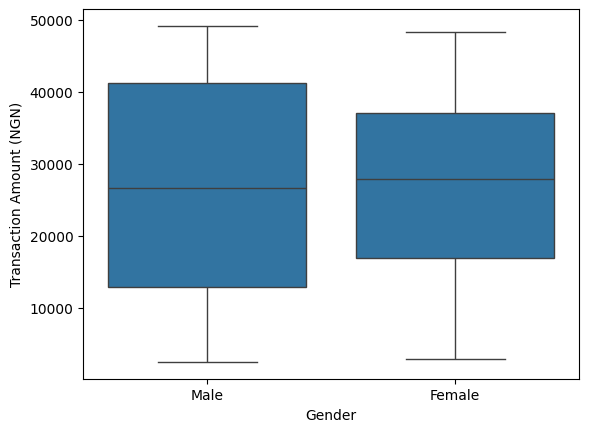

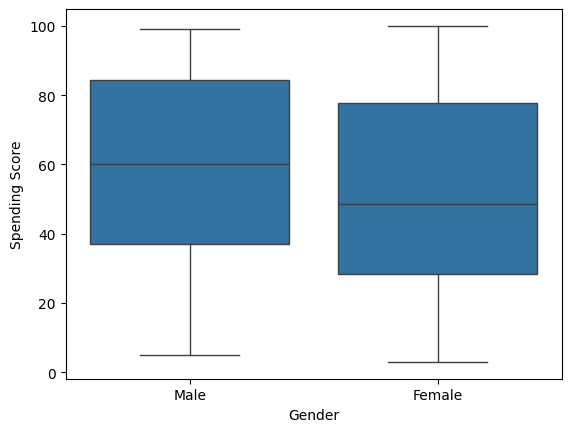

In [14]:
columns = ['Age', 'Transaction Amount (NGN)','Spending Score']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [19]:
df['Gender'].value_counts()

Gender
Female    54
Male      46
Name: count, dtype: int64

In [20]:
#Bivariate Analysis

<Axes: xlabel='Transaction Amount (NGN)', ylabel='Spending Score'>

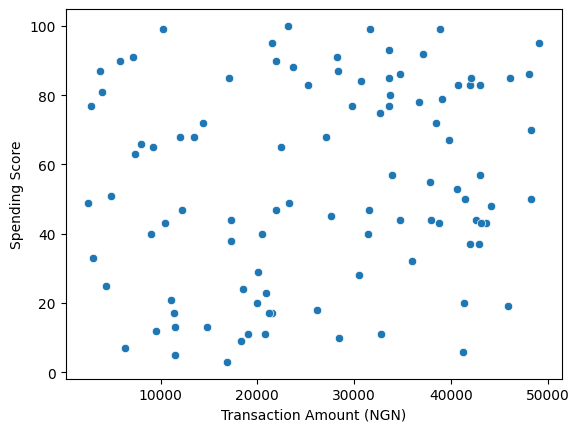

In [21]:
sns.scatterplot(data=df, x='Transaction Amount (NGN)',y='Spending Score' )

In [29]:
df.groupby(['Gender'])[['Age', 'Transaction Amount (NGN)',
       'Spending Score']].mean()

,Age,Transaction Amount (NGN),Spending Score
Gender,,,
Female,40.814815,25894.370370,51.740741
Male,36.021739,26728.326087,57.326087


In [31]:
selected_columns = ['Age', 'Transaction Amount (NGN)','Spending Score']

# Create a new DataFrame with only the selected columns
selected_data = df[selected_columns]

# Compute the correlation
correlation= selected_data.corr()

# Display the correlation matrix
print(correlation)

                               Age  Transaction Amount (NGN)  Spending Score
Age                       1.000000                  0.049385       -0.063228
Transaction Amount (NGN)  0.049385                  1.000000        0.181395
Spending Score           -0.063228                  0.181395        1.000000


<Axes: >

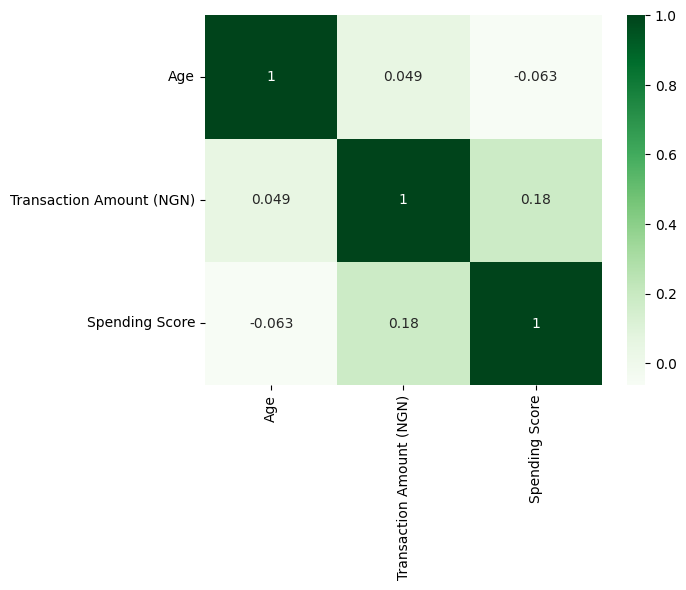

In [34]:
sns.heatmap(correlation,annot= True, cmap='Greens')

In [35]:
# Clustering Analysis using KMeans Algorithms

In [55]:
Cluster1 = KMeans(n_clusters=4)

In [56]:
Cluster1.fit(df[['Transaction Amount (NGN)']])

KMeans(n_clusters=4)

In [57]:
Cluster1.labels_

array([1, 1, 0, 2, 1, 0, 1, 3, 2, 3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 3, 1, 1, 2, 3, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 0, 3, 2, 1, 2, 2, 3, 3, 3, 3, 0, 0, 1, 2, 0, 1, 0, 1, 0, 3,
       2, 0, 3, 1, 2, 0, 0, 3, 2, 0, 3, 0, 2, 2, 2, 0, 3, 1, 3, 0, 2, 0,
       1, 1, 0, 2, 2, 3, 3, 3, 3, 0, 3, 2], dtype=int32)

In [59]:
df['Transaction Amount (NGN)_cluster'] = Cluster1.labels_
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful,Transaction Amount (NGN)_cluster
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1,1
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0,1
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0,0
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1,2
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1,1


In [60]:
# Count how many variables are in each clusters

df['Transaction Amount (NGN)_cluster'].value_counts()

Transaction Amount (NGN)_cluster
1    29
0    24
2    24
3    23
Name: count, dtype: int64

In [61]:
Cluster1.inertia_

961482757.0078087

In [62]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Transaction Amount (NGN)']])
    intertia_scores.append(kmeans.inertia_)

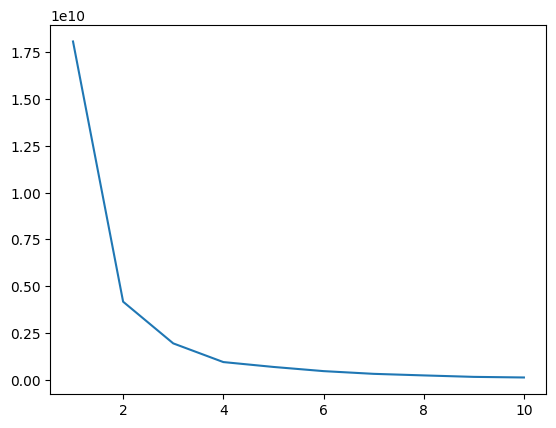

In [63]:
plt.plot(range(1,11),intertia_scores)

In [65]:
# Look into the mean values group by Transactio Amount_Cluster

df.groupby(['Transaction Amount (NGN)_cluster'])[['Age', 'Transaction Amount (NGN)',
       'Spending Score']].mean()

,Age,Transaction Amount (NGN),Spending Score
Transaction Amount (NGN)_cluster,,,
0,39.333333,20059.208333,44.708333
1,38.862069,42327.241379,59.586207
2,35.833333,7972.500000,50.750000
3,40.434783,31632.521739,61.391304


In [66]:
df.columns

Index(['CustomerID', 'Location', 'Date', 'Transaction Hour', 'Gender', 'Age',
       'Annual Income (NGN)', 'Spending Score', 'Payment Method',
       'Device Used', 'Product Category', 'Transaction Amount (NGN)',
       'Is Payment Successful', 'Transaction Amount (NGN)_cluster'],
      dtype='object')

In [70]:
# Bivariate clustering Analysis using Kmeans

cluster2 = KMeans(n_clusters=3)
cluster2.fit(df[['Transaction Amount (NGN)','Spending Score']])
df['Spending score and Transaction Amount_clusters'] =cluster2.labels_
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful,Transaction Amount (NGN)_cluster,Spending score and Transaction Amount_clusters
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1,1,1
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0,1,1
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0,0,0
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1,2,2
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1,1,1


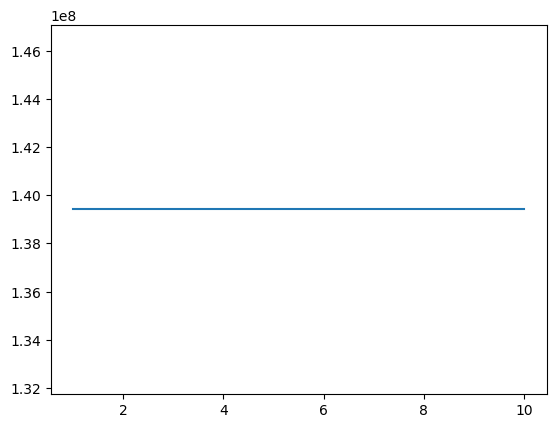

In [71]:
intertia_scores_2=[]
for i in range(1,11):
    kmeans_2=KMeans(n_clusters=i)
    kmeans_2.fit(df[['Transaction Amount (NGN)','Spending Score']])
    intertia_scores_2.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores_2)

In [94]:
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,22873.903226,48.258065
1,39492.627907,61.209302
2,8481.730769,50.115385


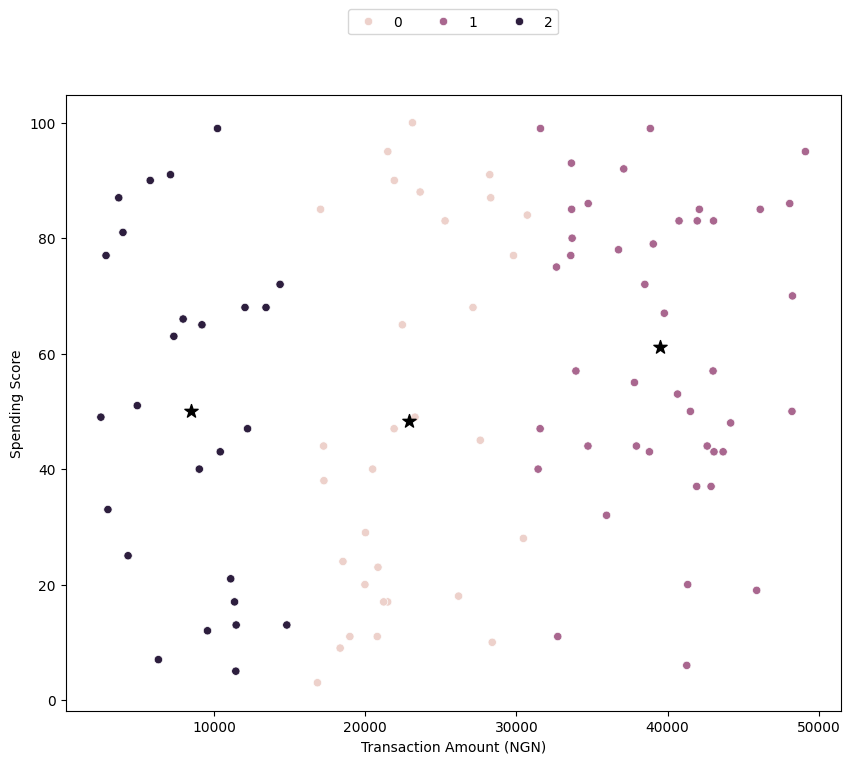

In [100]:
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(data=df, x='Transaction Amount (NGN)', y='Spending Score', hue='Spending score and Transaction Amount_clusters', palette=None)
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
# Position the hue legend at the top
scatterplot.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

In [104]:
pd.crosstab(df['Spending score and Transaction Amount_clusters'],df['Gender'],normalize='index')

Gender,Female,Male
Spending score and Transaction Amount_clusters,,
0,0.580645,0.419355
1,0.534884,0.465116
2,0.500000,0.500000


In [108]:
max_age = df['Age'].max()
print("The maximum age in the DataFrame is:", max_age)

The maximum age in the DataFrame is: 60


In [112]:
pd.crosstab(df['Spending score and Transaction Amount_clusters'],df['Age'].max(),normalize='index')

col_0,60
Spending score and Transaction Amount_clusters,
0,1.0
1,1.0
2,1.0


In [113]:
df.groupby(['Spending score and Transaction Amount_clusters'])[['Age', 'Transaction Amount (NGN)',
       'Spending Score','Transaction Hour']].mean()

,Age,Transaction Amount (NGN),Spending Score,Transaction Hour
Spending score and Transaction Amount_clusters,,,,
0,40.419355,22873.903226,48.258065,10.451613
1,38.395349,39492.627907,61.209302,11.767442
2,36.807692,8481.730769,50.115385,10.538462


In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
df.columns

Index(['CustomerID', 'Location', 'Date', 'Transaction Hour', 'Gender', 'Age',
       'Annual Income (NGN)', 'Spending Score', 'Payment Method',
       'Device Used', 'Product Category', 'Transaction Amount (NGN)',
       'Is Payment Successful', 'Transaction Amount (NGN)_cluster',
       'Spending score and Transaction Amount_clusters'],
      dtype='object')

In [116]:
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful,Transaction Amount (NGN)_cluster,Spending score and Transaction Amount_clusters
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1,1,1
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0,1,1
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0,0,0
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1,2,2
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1,1,1


In [120]:
# getting the count of payment that are succesful

df['Is Payment Successful'].value_counts()

Is Payment Successful
0    57
1    43
Name: count, dtype: int64

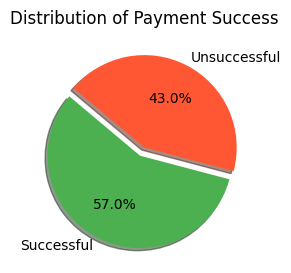

In [128]:
payment_success_distribution = df['Is Payment Successful'].value_counts()

# Plot the pie chart
labels = ['Successful', 'Unsuccessful']
sizes = payment_success_distribution.values
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)  # Explode the first slice (Successful)

plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Payment Success')
plt.show()

In [129]:
# Features and target
X = df.drop(['CustomerID', 'Date', 'Is Payment Successful'], axis=1)
y = df['Is Payment Successful']

In [134]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Is Payment Successful, dtype: int64

In [131]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
import numpy as np


In [136]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

43
26
17


In [138]:
cols = list(X.columns.values)

In [152]:
df.columns

Index(['CustomerID', 'Location', 'Date', 'Transaction Hour', 'Gender', 'Age',
       'Annual Income (NGN)', 'Spending Score', 'Payment Method',
       'Device Used', 'Product Category', 'Transaction Amount (NGN)',
       'Is Payment Successful', 'Transaction Amount (NGN)_cluster',
       'Spending score and Transaction Amount_clusters'],
      dtype='object')

In [154]:
# Encode categorical features using one-hot encoding
categorical_features = ['Location', 'Gender', 'Payment Method', 'Device Used', 'Product Category']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Split the data into features and target variable
X = df_encoded.drop(['CustomerID', 'Date', 'Is Payment Successful'], axis=1)
y = df_encoded['Is Payment Successful']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [155]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [156]:
# Make predictions
y_pred = clf.predict(X_test)

In [162]:
# Evaluate the model
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')

    0  1
0  12  1
1  15  2
              precision    recall  f1-score   support

           0       0.44      0.92      0.60        13
           1       0.67      0.12      0.20        17

    accuracy                           0.47        30
   macro avg       0.56      0.52      0.40        30
weighted avg       0.57      0.47      0.37        30

Accuracy: 46.67%


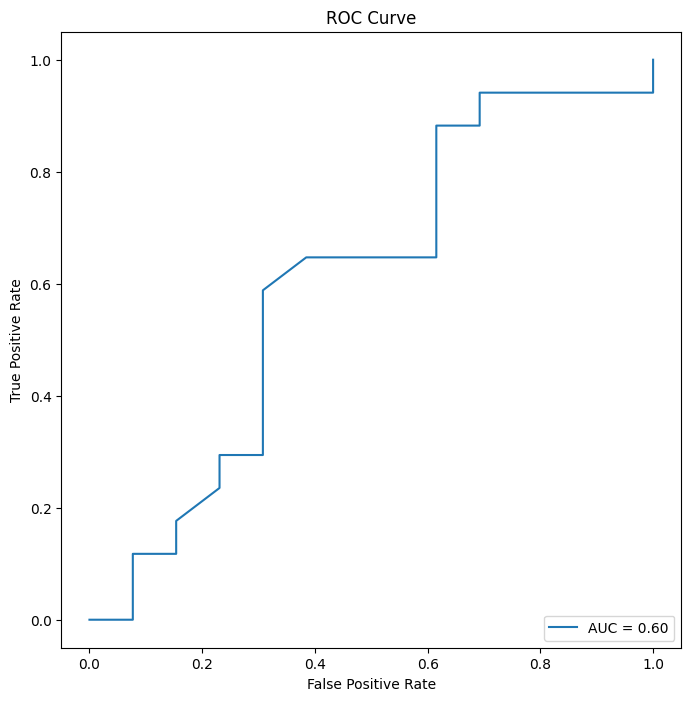

In [163]:
# Plot the ROC Curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [167]:
# Plot the distribution of payment success
payment_success_distribution = df['Is Payment Successful'].value_counts()
labels = ['Not fraudulent', 'Fraudulent']
sizes = payment_success_distribution.values
colors = ['#4CAF50', '#FF5733']  # Green for success, Red for failure
explode = (0.1, 0)  # Explode the first slice (Successful)

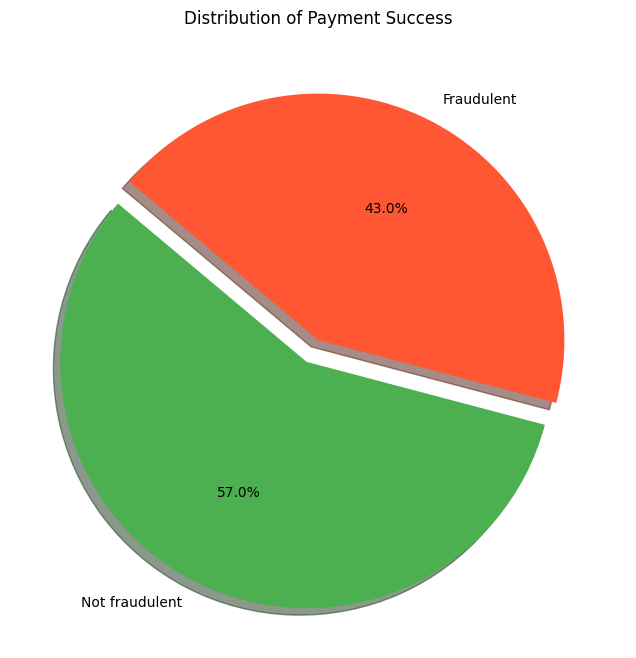

In [169]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Payment Success')
plt.show()